# Image Classification with CNN and ANN

## Loading the Dataset

In [90]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow.keras.layers import Input, Flatten, Dense ,Dropout
from tensorflow.keras import layers, models, Input
from tensorflow.keras.optimizers import Adam , SGD
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import clone_model, Model, Sequential
from sklearn.model_selection import train_test_split

In [2]:
cifar10 = tf.keras.datasets.cifar10

In [3]:
(X_train,y_train),(X_test,y_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


## Exploring the Dataset

In [4]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


### Defining classes in the Dataset

In [5]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Preview

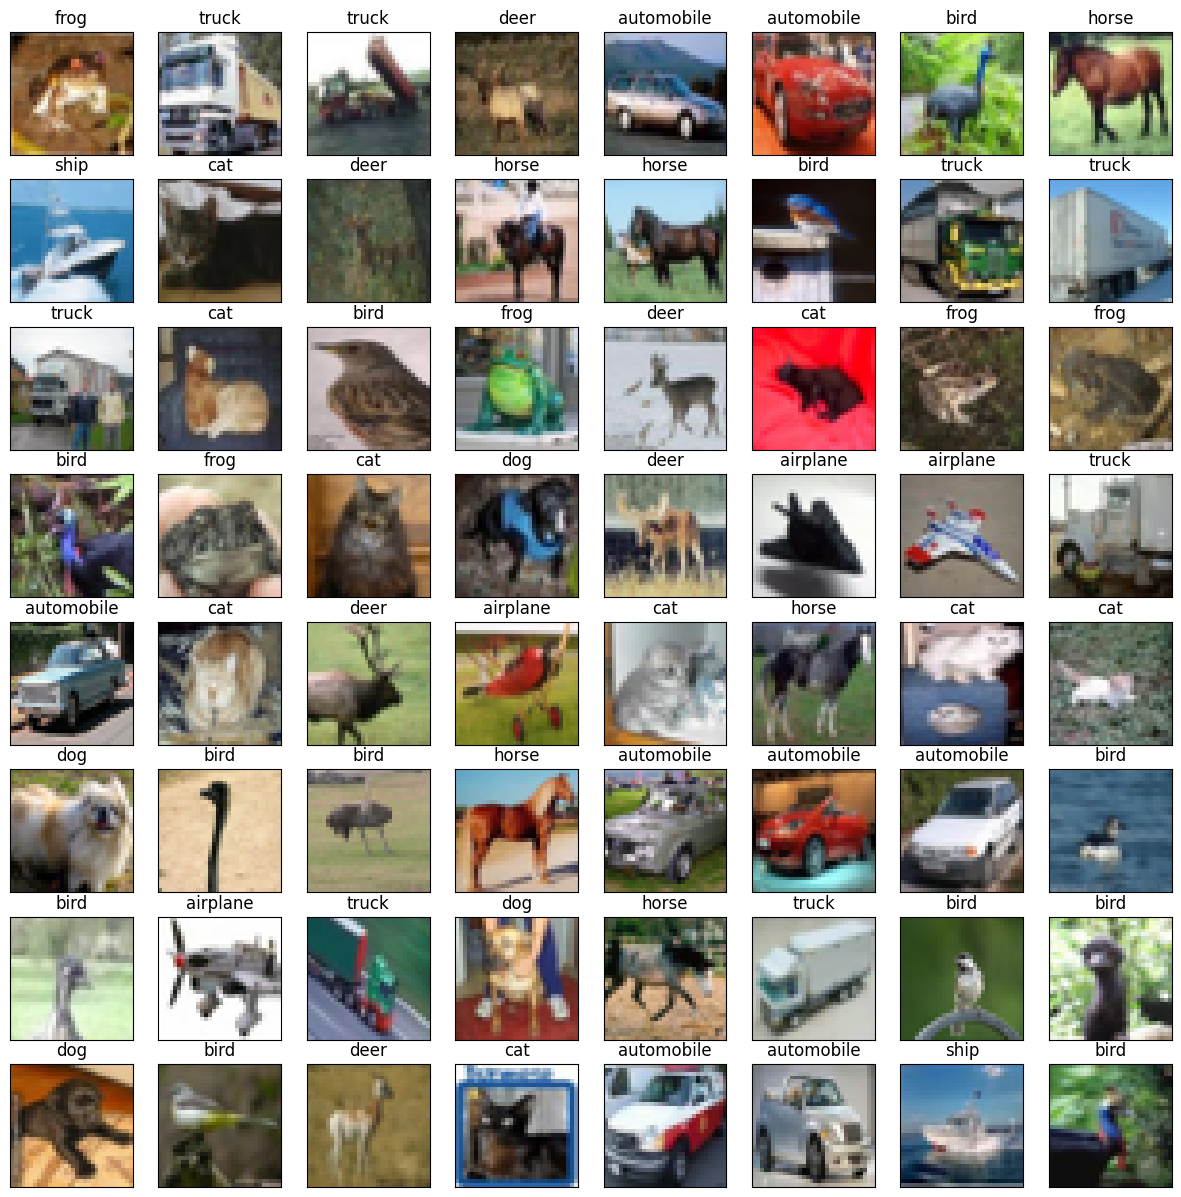

In [7]:
plt.figure(figsize=(15,15))

for i in range(64):
    plt.subplot(8, 8, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)

    plt.imshow(X_train[i])

    plt.title(class_names[y_train[i][0]], fontsize=12)

plt.show()

array([[[126, 118, 110],
        [122, 115, 108],
        [126, 119, 111],
        ...,
        [124, 118, 106],
        [120, 114, 102],
        [117, 111,  99]],

       [[122, 115, 107],
        [119, 112, 104],
        [121, 114, 106],
        ...,
        [124, 118, 106],
        [122, 116, 104],
        [117, 111,  99]],

       [[122, 115, 107],
        [121, 114, 106],
        [121, 114, 106],
        ...,
        [126, 120, 108],
        [123, 117, 105],
        [121, 115, 103]],

       ...,

       [[126, 118, 107],
        [126, 118, 107],
        [128, 120, 109],
        ...,
        [133, 125, 114],
        [122, 114, 103],
        [114, 106,  95]],

       [[125, 117, 106],
        [126, 118, 107],
        [127, 119, 108],
        ...,
        [128, 120, 109],
        [121, 113, 102],
        [114, 106,  95]],

       [[123, 115, 104],
        [123, 115, 104],
        [126, 118, 107],
        ...,
        [128, 119, 109],
        [126, 118, 107],
        [121, 113, 102]]], dtype=uint8)
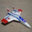

In [10]:
X_train[30]

In [11]:
X_train[0][0][0]

array([59, 62, 63], dtype=uint8)

## Normalise

In [13]:
X_train = X_train.astype('float32')/250
X_test = X_test.astype('float32')/250

In [14]:
unique , counts = np.unique(y_train ,return_counts=True)

## Balanced

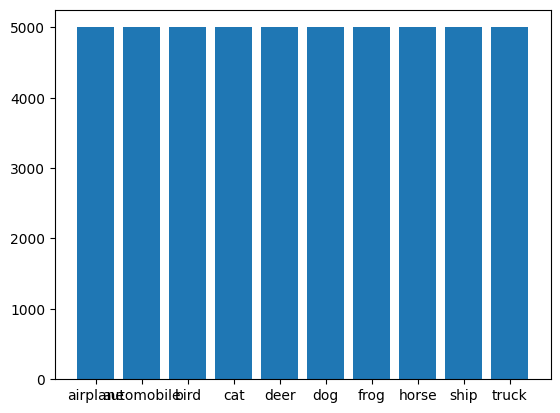

In [15]:
plt.bar(unique,counts)
plt.xticks(unique , class_names)
plt.show()

 # Let's First Try MLP and then we'll compare its results with CNN

In [37]:
mlp = Sequential([
    Input(shape=(32,32,3)),# image is 32x32x3
    Flatten(),
    Dense(512,activation='relu'),
    Dropout(0.3),
    Dense(256,activation='relu'),
    Dropout(0.2),
    Dense(128,activation='relu'),
    Dropout(0.1),
    Dense(10,activation='softmax'),
])
mlp.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_5 (Flatten)             │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 512)            │     1,573,376 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,738,890 (6.63 MB)

 Trainable params: 1,738,890 (6.63 MB)

 Non-trainable params: 0 (0.00 B)

In [38]:
mlp.compile(optimizer=Adam(learning_rate=0.001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [39]:
history_mlp = mlp.fit(X_train,y_train,epochs=30,validation_split=0.1)

Epoch 1/30
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.1881 - loss: 2.1698 - val_accuracy: 0.3116 - val_loss: 1.9039
Epoch 2/30
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.2644 - loss: 1.9620 - val_accuracy: 0.3152 - val_loss: 1.8769
Epoch 3/30
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.2952 - loss: 1.9072 - val_accuracy: 0.3448 - val_loss: 1.8305
Epoch 4/30
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.3076 - loss: 1.8822 - val_accuracy: 0.3634 - val_loss: 1.8184
Epoch 5/30
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.3157 - loss: 1.8723 - val_accuracy: 0.3476 - val_loss: 1.8148
Epoch 6/30
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.3157 - loss: 1.8526 - val_accuracy: 0.3682 - val_loss: 1.7803
Epoch 7/30
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.3269 - loss: 1.8413 - val_accuracy: 0.3478 - val_loss: 1.8248
Epoch 8/30
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.3318 - loss: 1.8263 -

In [40]:
test_loss, test_accuracy = mlp.evaluate(X_test, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4068 - loss: 1.6882
Test Loss: 1.6898939609527588
Test Accuracy: 0.4032000005245209


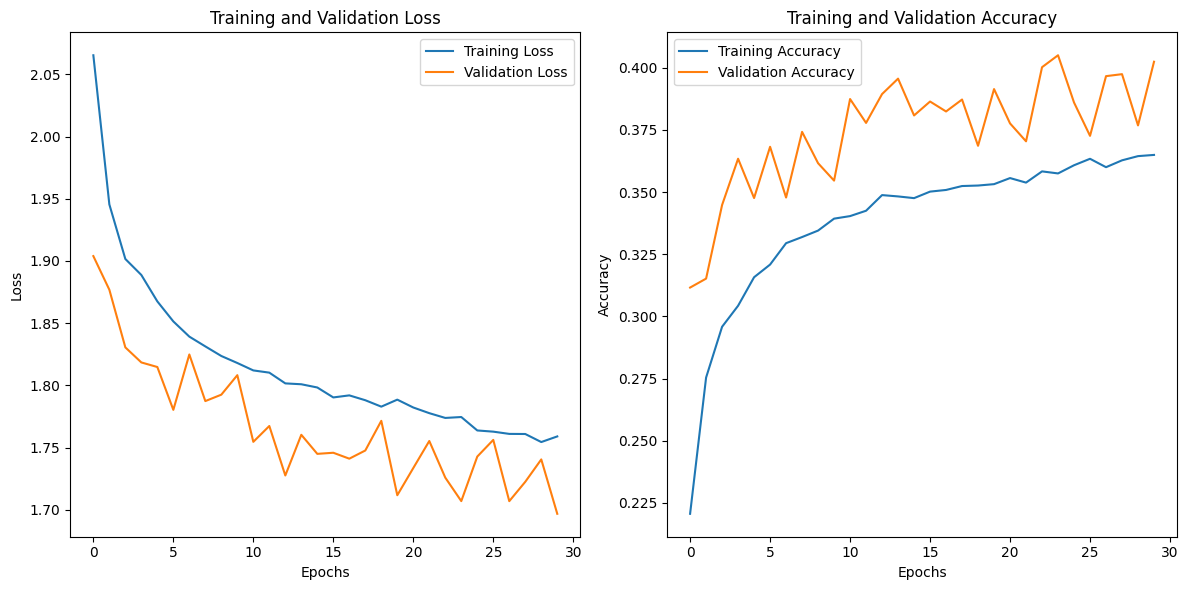

In [42]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history_mlp.history['loss'], label='Training Loss')
plt.plot(history_mlp.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_mlp.history['accuracy'], label='Training Accuracy')
plt.plot(history_mlp.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [43]:
mlp_prediction = mlp.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [55]:
predicted_labels_mlp = np.argmax(mlp_prediction, axis=1)

In [51]:
prediction_labels[0]

array([0.02965942, 0.04841317, 0.12430973, 0.21681112, 0.11162709,
       0.14723231, 0.19148916, 0.05511543, 0.03308883, 0.04225371],
      dtype=float32)

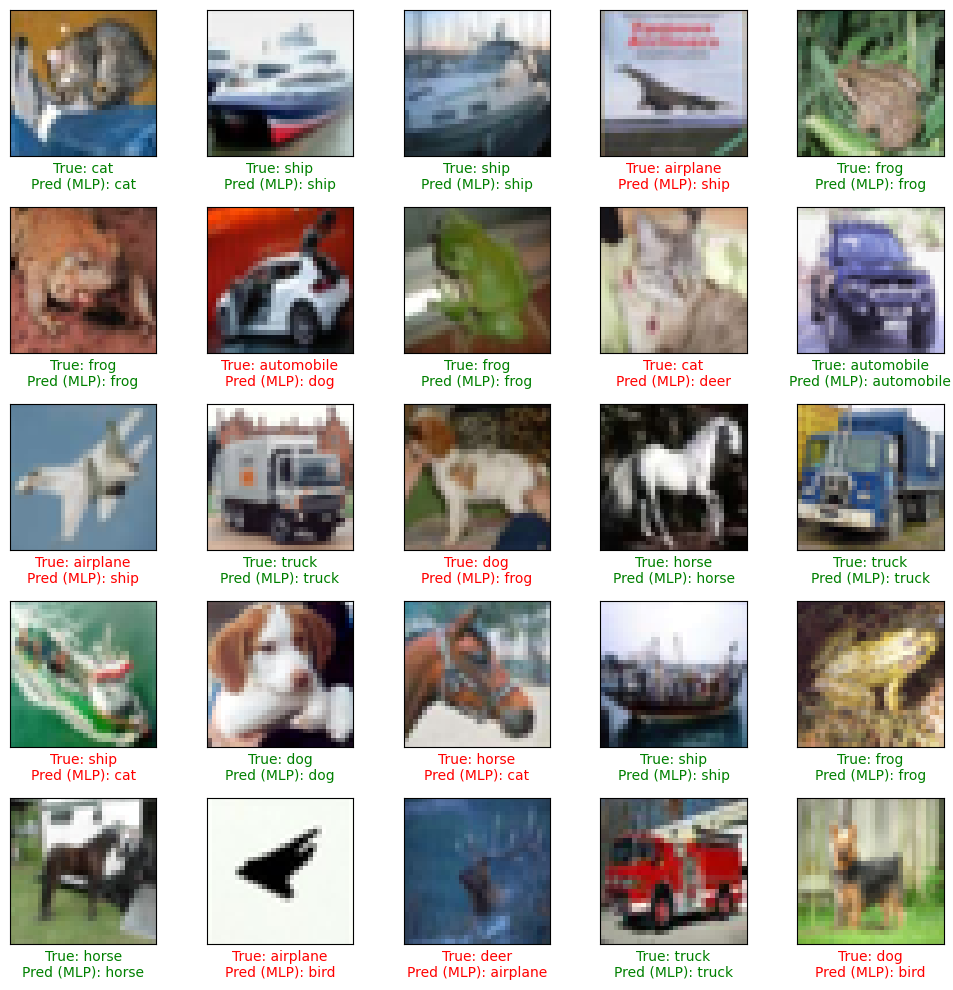

In [56]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_test[i])
    true_label = class_names[y_test[i][0]]
    predicted_label_mlp = class_names[predicted_labels_mlp[i]]
    if true_label == predicted_label_mlp:
        color = 'green'
    else:
        color = 'red'
    plt.xlabel(f"True: {true_label}\nPred (MLP): {predicted_label_mlp}", color=color)
plt.tight_layout()
plt.show()

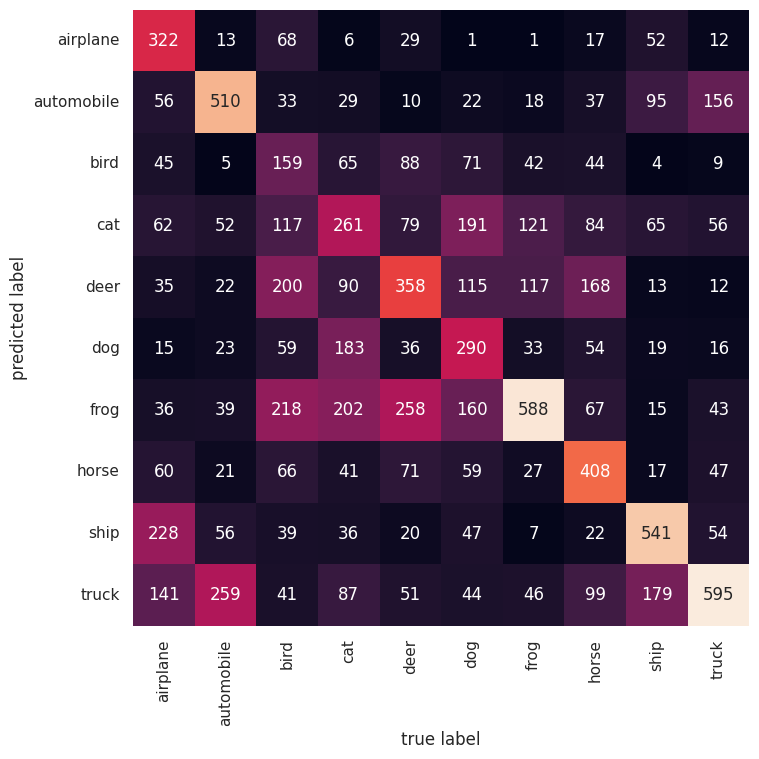

In [57]:
from sklearn.metrics import classification_report,confusion_matrix

mat = confusion_matrix(y_test, predicted_labels_mlp)
plt.figure(figsize=(8, 8)); sns.set()
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=class_names, yticklabels=class_names)
plt.xlabel('true label'); plt.ylabel('predicted label'); plt.show()

In [58]:
print(classification_report(y_test, predicted_labels_mlp, target_names=class_names))

              precision    recall  f1-score   support

    airplane       0.62      0.32      0.42      1000
  automobile       0.53      0.51      0.52      1000
        bird       0.30      0.16      0.21      1000
         cat       0.24      0.26      0.25      1000
        deer       0.32      0.36      0.34      1000
         dog       0.40      0.29      0.34      1000
        frog       0.36      0.59      0.45      1000
       horse       0.50      0.41      0.45      1000
        ship       0.52      0.54      0.53      1000
       truck       0.39      0.59      0.47      1000

    accuracy                           0.40     10000
   macro avg       0.42      0.40      0.40     10000
weighted avg       0.42      0.40      0.40     10000



Our Traditional MLP has failed with just 40% accuracy this model is unable to understand relation between the pixels it's just working with individual pixels.

# Convolution Neural Network (CNN)

In [65]:
cnn_model = models.Sequential(name='CNN_model')

cnn_model.add(layers.InputLayer(input_shape = (32, 32, 3)))
cnn_model.add(layers.Conv2D(32, (3,3), activation='relu',padding = 'same'))
cnn_model.add(layers.Conv2D(64, (3,3),activation = 'relu', padding= 'same'))
cnn_model.add(layers.MaxPooling2D(2,2))
cnn_model.add(layers.Dropout(0.25))
cnn_model.add(layers.Conv2D(64, (3,3),activation = 'relu', padding= 'same'))
cnn_model.add(layers.MaxPooling2D(2,2))
cnn_model.add(layers.Dropout(0.25))

cnn_model.add(layers.Flatten())
cnn_model.add(layers.Dense(128, activation='relu'))
cnn_model.add(layers.Dropout(0.5))
cnn_model.add(layers.Dense(10, activation='softmax'))

cnn_model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "CNN_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 32, 32, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_7 (Flatten)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 128)            │       524,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 582,026 (2.22 MB)

 Trainable params: 582,026 (2.22 MB)

 Non-trainable params: 0 (0.00 B)

In [66]:
cnn_model.compile(optimizer=Adam(learning_rate=0.001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [67]:
cnn_history = cnn_model.fit(X_train,y_train,batch_size = 256,epochs=50,validation_split=0.1)

Epoch 1/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 12s 42ms/step - accuracy: 0.2298 - loss: 2.0636 - val_accuracy: 0.4450 - val_loss: 1.5372
Epoch 2/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - accuracy: 0.4212 - loss: 1.5783 - val_accuracy: 0.5446 - val_loss: 1.3007
Epoch 3/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - accuracy: 0.4915 - loss: 1.4003 - val_accuracy: 0.5888 - val_loss: 1.1696
Epoch 4/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - accuracy: 0.5356 - loss: 1.2938 - val_accuracy: 0.6426 - val_loss: 1.0431
Epoch 5/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - accuracy: 0.5730 - loss: 1.1952 - val_accuracy: 0.6644 - val_loss: 0.9796
Epoch 6/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - accuracy: 0.5943 - loss: 1.1360 - val_accuracy: 0.6868 - val_loss: 0.9284
Epoch 7/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - accuracy: 0.6192 - loss: 1.0767 - val_accuracy: 0.6968 - val_loss: 0.9217
Epoch 8/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - accuracy: 0.6325 - loss: 1.0493 - val_acc

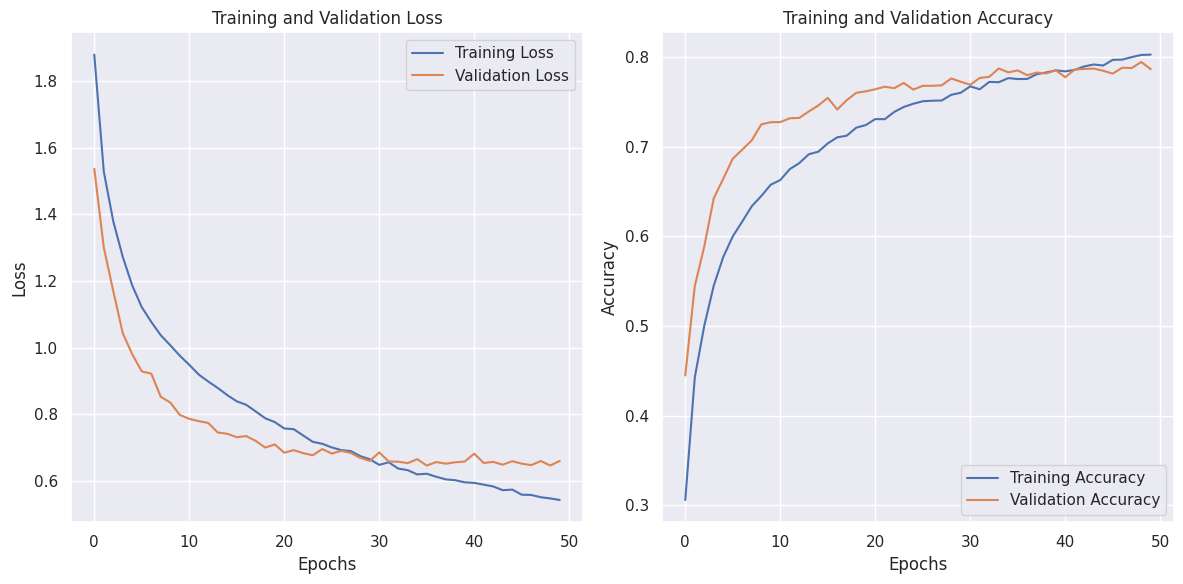

In [68]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(cnn_history.history['loss'], label='Training Loss')
plt.plot(cnn_history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(cnn_history.history['accuracy'], label='Training Accuracy')
plt.plot(cnn_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [69]:
test_loss, test_accuracy = cnn_model.evaluate(X_test, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.7823 - loss: 0.6684
Test Loss: 0.6735339164733887
Test Accuracy: 0.7817999720573425


In [70]:
# Get predictions for the test set
predictions_cnn = cnn_model.predict(X_test)
predicted_labels_cnn = np.argmax(predictions_cnn, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step


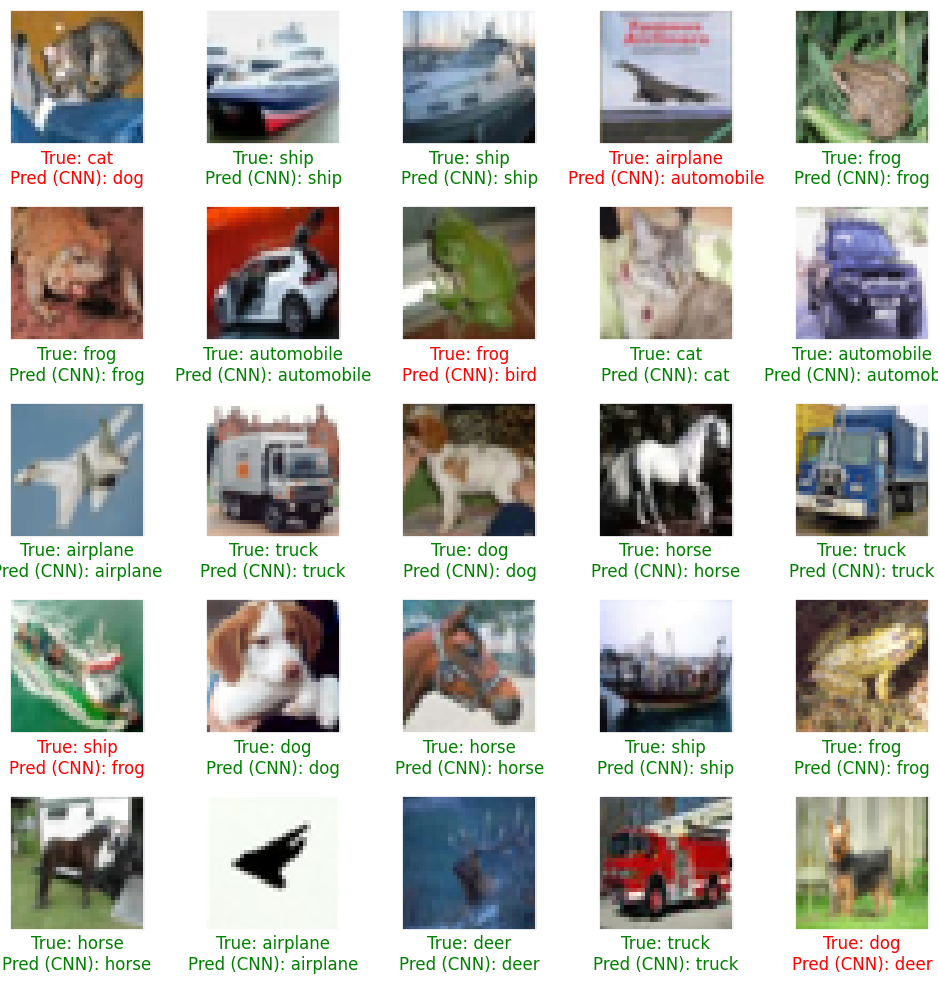

In [71]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_test[i])
    true_label = class_names[y_test[i][0]]
    predicted_label = class_names[predicted_labels_cnn[i]]
    if true_label == predicted_label:
        color = 'green'
    else:
        color = 'red'
    plt.xlabel(f"True: {true_label}\nPred (CNN): {predicted_label}", color=color)
plt.tight_layout()
plt.show()

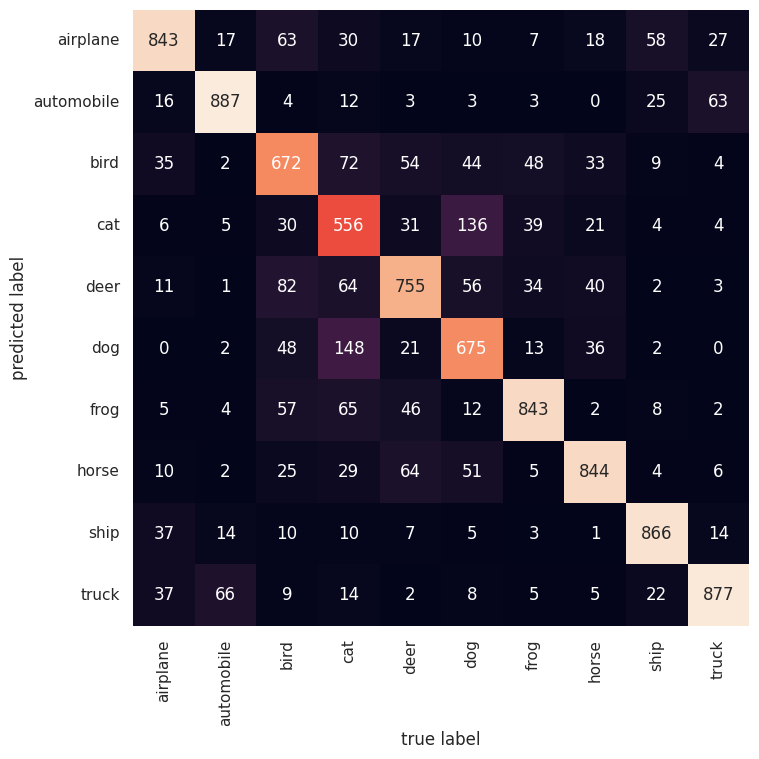

In [72]:
mat = confusion_matrix(y_test, predicted_labels_cnn)
plt.figure(figsize=(8, 8)); sns.set()
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=class_names, yticklabels=class_names)
plt.xlabel('true label'); plt.ylabel('predicted label'); plt.show()

# CNN_2 More Depth ,Batch Normalisation, L2 Regularisation and Callbacks

In [73]:
cnn_2 = models.Sequential(name='CNN_2')

cnn_2.add(layers.InputLayer(input_shape=(32, 32, 3)))

cnn_2.add(layers.Conv2D(32, (3,3), padding='same',
                        kernel_regularizer=regularizers.l2(0.001)))
cnn_2.add(layers.BatchNormalization())
cnn_2.add(layers.Activation('relu'))

cnn_2.add(layers.Conv2D(64, (3,3), padding='same',
                        kernel_regularizer=regularizers.l2(0.001)))
cnn_2.add(layers.BatchNormalization())
cnn_2.add(layers.Activation('relu'))

cnn_2.add(layers.MaxPooling2D(2,2))
cnn_2.add(layers.Dropout(0.25))

cnn_2.add(layers.Conv2D(64, (3,3), padding='same',
                        kernel_regularizer=regularizers.l2(0.001)))
cnn_2.add(layers.BatchNormalization())
cnn_2.add(layers.Activation('relu'))

cnn_2.add(layers.MaxPooling2D(2,2))
cnn_2.add(layers.Dropout(0.25))

cnn_2.add(layers.Conv2D(64, (3,3), padding='same',
                        kernel_regularizer=regularizers.l2(0.001)))
cnn_2.add(layers.BatchNormalization())
cnn_2.add(layers.Activation('relu'))

cnn_2.add(layers.MaxPooling2D(2,2))
cnn_2.add(layers.Dropout(0.25))

cnn_2.add(layers.Conv2D(64, (3,3), padding='same',
                        kernel_regularizer=regularizers.l2(0.001)))
cnn_2.add(layers.BatchNormalization())
cnn_2.add(layers.Activation('relu'))

cnn_2.add(layers.MaxPooling2D(2,2))
cnn_2.add(layers.Dropout(0.25))

cnn_2.add(layers.Flatten())

cnn_2.add(layers.Dense(128, kernel_regularizer=regularizers.l2(0.001)))
cnn_2.add(layers.BatchNormalization())
cnn_2.add(layers.Activation('relu'))
cnn_2.add(layers.Dropout(0.5))

cnn_2.add(layers.Dense(64, kernel_regularizer=regularizers.l2(0.001)))
cnn_2.add(layers.BatchNormalization())
cnn_2.add(layers.Activation('relu'))
cnn_2.add(layers.Dropout(0.3))

cnn_2.add(layers.Dense(10, activation='softmax'))

cnn_2.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "CNN_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_7 (Conv2D)               │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 32, 32, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 32, 32, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 8, 8, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 8, 8, 64)       │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_17 (Dropout)            │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 4, 4, 64)       │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 2, 2, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 173,898 (679.29 KB)

 Trainable params: 172,938 (675.54 KB)

 Non-trainable params: 960 (3.75 KB)

# Justification:

# Depth: To capture Details

# Droputs : To prevent overfitting

# L1 Regularisation adds weights panalty might resulting into weights turns 0 that's why i chose L2 Regularisation


In [78]:
cnn_2.compile(optimizer=Adam(learning_rate=0.001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [76]:
reduce_lr = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.5,
                              patience=3,
                              verbose=1,
                              min_lr=1e-6)

In [75]:
early_stop = EarlyStopping(monitor = 'val_loss',patience = 4, restore_best_weights = True,verbose = 1)

In [79]:
history_cnn_2 = cnn_2.fit(
    X_train, y_train,
    validation_split=0.2,
    batch_size=256,
    epochs=50,
    callbacks=[early_stop , reduce_lr]
)

Epoch 1/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 27s 91ms/step - accuracy: 0.1888 - loss: 2.7963 - val_accuracy: 0.1052 - val_loss: 3.5883 - learning_rate: 0.0010
Epoch 2/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 23s 27ms/step - accuracy: 0.3625 - loss: 2.1431 - val_accuracy: 0.1066 - val_loss: 3.6863 - learning_rate: 0.0010
Epoch 3/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - accuracy: 0.4585 - loss: 1.8433 - val_accuracy: 0.2310 - val_loss: 2.7278 - learning_rate: 0.0010
Epoch 4/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - accuracy: 0.5154 - loss: 1.6678 - val_accuracy: 0.4865 - val_loss: 1.7770 - learning_rate: 0.0010
Epoch 5/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - accuracy: 0.5701 - loss: 1.4892 - val_accuracy: 0.3167 - val_loss: 2.4079 - learning_rate: 0.0010
Epoch 6/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - accuracy: 0.6091 - loss: 1.3679 - val_accuracy: 0.5582 - val_loss: 1.5021 - learning_rate: 0.0010
Epoch 7/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - accuracy: 0.6329 - loss: 

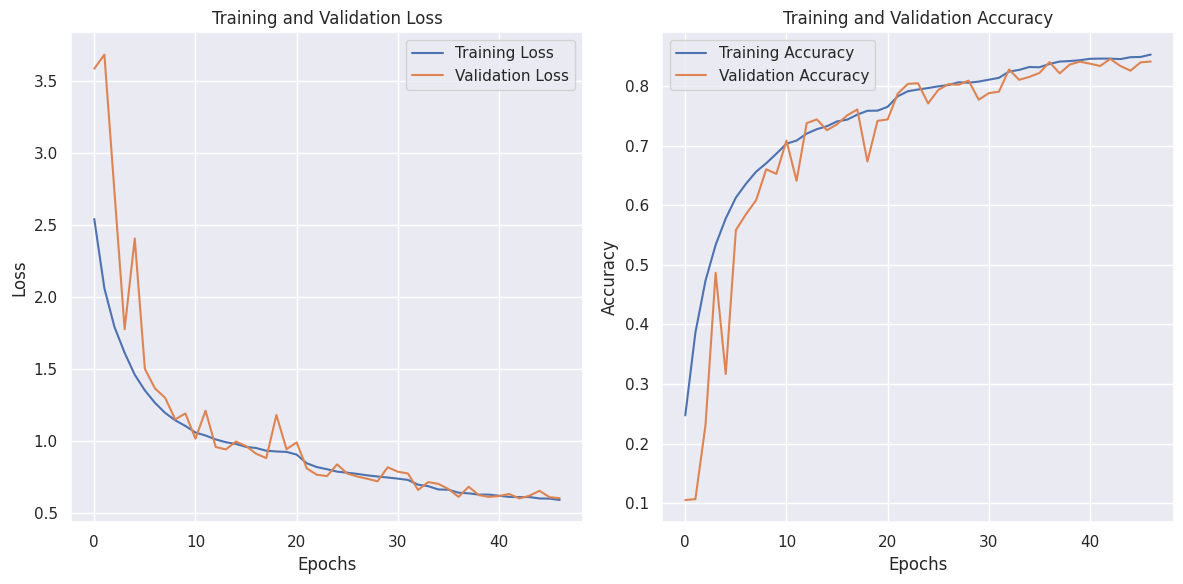

In [80]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history_cnn_2.history['loss'], label='Training Loss')
plt.plot(history_cnn_2.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_cnn_2.history['accuracy'], label='Training Accuracy')
plt.plot(history_cnn_2.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [81]:
test_loss, test_accuracy = cnn_2.evaluate(X_test, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8405 - loss: 0.6277
Test Loss: 0.6310672163963318
Test Accuracy: 0.8373000025749207


In [82]:
# Get predictions for the test set
predictions_cnn = cnn_2.predict(X_test)
predicted_labels_cnn = np.argmax(predictions_cnn, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step


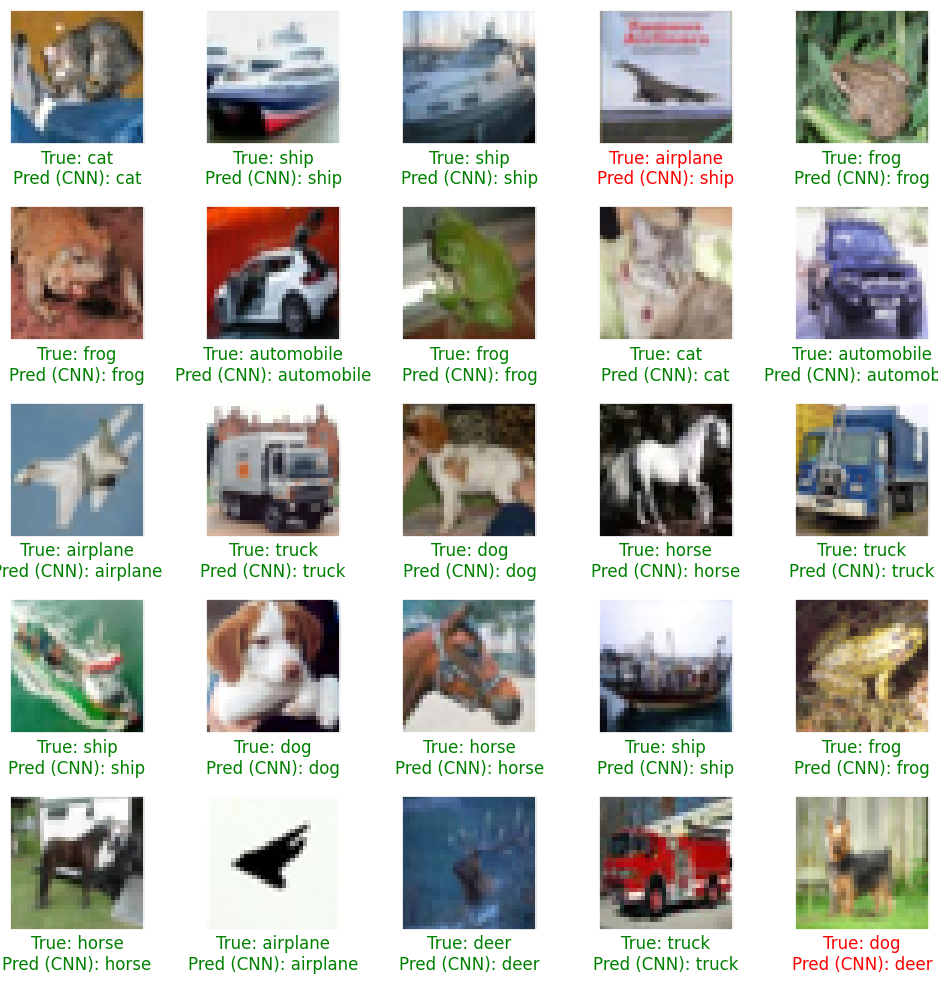

In [84]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_test[i])
    true_label = class_names[y_test[i][0]]
    predicted_label = class_names[predicted_labels_cnn[i]]
    if true_label == predicted_label:
        color = 'green'
    else:
        color = 'red'
    plt.xlabel(f"True: {true_label}\nPred (CNN): {predicted_label}", color=color)
plt.tight_layout()
plt.show()

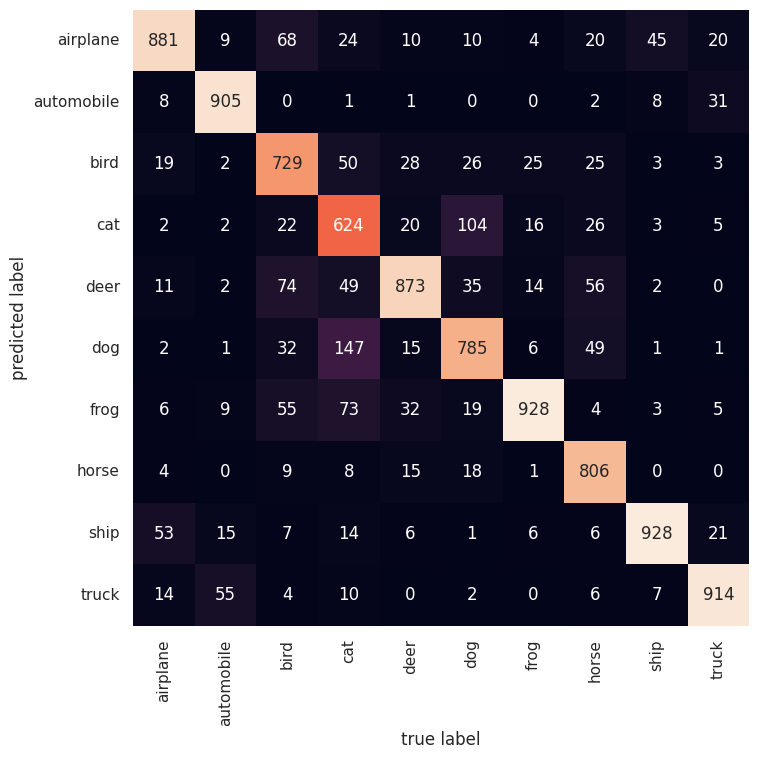

In [85]:
mat = confusion_matrix(y_test, predicted_labels_cnn)
plt.figure(figsize=(8, 8)); sns.set()
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=class_names, yticklabels=class_names)
plt.xlabel('true label'); plt.ylabel('predicted label'); plt.show()

In [86]:
print(classification_report(y_test, predicted_labels_cnn, target_names=class_names))

              precision    recall  f1-score   support

    airplane       0.81      0.88      0.84      1000
  automobile       0.95      0.91      0.93      1000
        bird       0.80      0.73      0.76      1000
         cat       0.76      0.62      0.68      1000
        deer       0.78      0.87      0.83      1000
         dog       0.76      0.79      0.77      1000
        frog       0.82      0.93      0.87      1000
       horse       0.94      0.81      0.87      1000
        ship       0.88      0.93      0.90      1000
       truck       0.90      0.91      0.91      1000

    accuracy                           0.84     10000
   macro avg       0.84      0.84      0.84     10000
weighted avg       0.84      0.84      0.84     10000



ACCURACY ACHIVED 84%

# COMPARISON WITH BASELINE MODEL
| Aspect                         | `cnn_model` (Baseline) | `cnn_2` (Improved) | Impact                         |
| ------------------------------ | ---------------------- | ------------------ | ------------------------------ |
| 🔢 **More Conv Layers**        | 3 Conv2D               | 5 Conv2D           | Captures more complex features |
| 🧠 **Deeper Fully Connected**  | 1 Dense layer          | 2 Dense layers     | Better high-level reasoning    |
| 🔁 **Regularization**          | Only Dropout           | L2 + Dropout       | Reduced overfitting            |
| 📦 **Batch Normalization**     | ❌                      | ✅                  | Improved training stability    |
| ⚙️ **Learning Rate Scheduler** | ❌                      | ✅         | Better convergence             |


## NOW LET'S TRY DIFFERENT OPTIMIZER

In [89]:
cnn_3 = models.Sequential(name='CNN_3')

cnn_3.add(layers.InputLayer(input_shape=(32, 32, 3)))

cnn_3.add(layers.Conv2D(32, (3,3), padding='same',
                        kernel_regularizer=regularizers.l2(0.001)))
cnn_3.add(layers.BatchNormalization())
cnn_3.add(layers.Activation('relu'))

cnn_3.add(layers.Conv2D(64, (3,3), padding='same',
                        kernel_regularizer=regularizers.l2(0.001)))
cnn_3.add(layers.BatchNormalization())
cnn_3.add(layers.Activation('relu'))

cnn_3.add(layers.MaxPooling2D(2,2))
cnn_3.add(layers.Dropout(0.25))

cnn_3.add(layers.Conv2D(64, (3,3), padding='same',
                        kernel_regularizer=regularizers.l2(0.001)))
cnn_3.add(layers.BatchNormalization())
cnn_3.add(layers.Activation('relu'))

cnn_3.add(layers.MaxPooling2D(2,2))
cnn_3.add(layers.Dropout(0.25))

cnn_3.add(layers.Conv2D(64, (3,3), padding='same',
                        kernel_regularizer=regularizers.l2(0.001)))
cnn_3.add(layers.BatchNormalization())
cnn_3.add(layers.Activation('relu'))

cnn_3.add(layers.MaxPooling2D(2,2))
cnn_3.add(layers.Dropout(0.25))

cnn_3.add(layers.Conv2D(64, (3,3), padding='same',
                        kernel_regularizer=regularizers.l2(0.001)))
cnn_3.add(layers.BatchNormalization())
cnn_3.add(layers.Activation('relu'))

cnn_3.add(layers.MaxPooling2D(2,2))
cnn_3.add(layers.Dropout(0.25))

cnn_3.add(layers.Flatten())

cnn_3.add(layers.Dense(128, kernel_regularizer=regularizers.l2(0.001)))
cnn_3.add(layers.BatchNormalization())
cnn_3.add(layers.Activation('relu'))
cnn_3.add(layers.Dropout(0.5))

cnn_3.add(layers.Dense(64, kernel_regularizer=regularizers.l2(0.001)))
cnn_3.add(layers.BatchNormalization())
cnn_3.add(layers.Activation('relu'))
cnn_3.add(layers.Dropout(0.3))

cnn_3.add(layers.Dense(10, activation='softmax'))

cnn_3.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "CNN_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)              │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_7 (Activation)       │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 32, 32, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 32, 32, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_8 (Activation)       │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_21 (Dropout)            │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_9 (Activation)       │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_22 (Dropout)            │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 8, 8, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 8, 8, 64)       │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_10 (Activation)      │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_23 (Dropout)            │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 4, 4, 64)       │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_11 (Activation)      │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 2, 2, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 173,898 (679.29 KB)

 Trainable params: 172,938 (675.54 KB)

 Non-trainable params: 960 (3.75 KB)

In [91]:
cnn_3.compile(optimizer = SGD(learning_rate=0.01, momentum=0.9, nesterov=True),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [92]:
history_cnn_3 = cnn_3.fit(
    X_train, y_train,
    validation_split=0.2,
    batch_size=256,
    epochs=50,
    callbacks=[early_stop , reduce_lr]
)

Epoch 1/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 22s 77ms/step - accuracy: 0.1757 - loss: 2.8119 - val_accuracy: 0.0997 - val_loss: 3.5985 - learning_rate: 0.0100
Epoch 2/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - accuracy: 0.3067 - loss: 2.2482 - val_accuracy: 0.1235 - val_loss: 3.7800 - learning_rate: 0.0100
Epoch 3/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - accuracy: 0.3677 - loss: 2.0842 - val_accuracy: 0.2335 - val_loss: 2.6774 - learning_rate: 0.0100
Epoch 4/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - accuracy: 0.4178 - loss: 1.9619 - val_accuracy: 0.3090 - val_loss: 2.4439 - learning_rate: 0.0100
Epoch 5/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - accuracy: 0.4573 - loss: 1.8466 - val_accuracy: 0.2230 - val_loss: 2.8342 - learning_rate: 0.0100
Epoch 6/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - accuracy: 0.4865 - loss: 1.7494 - val_accuracy: 0.2590 - val_loss: 2.6680 - learning_rate: 0.0100
Epoch 7/50
156/157 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.5145 - loss: 1

# We can observe that with different optimiser accuracy detoriated .

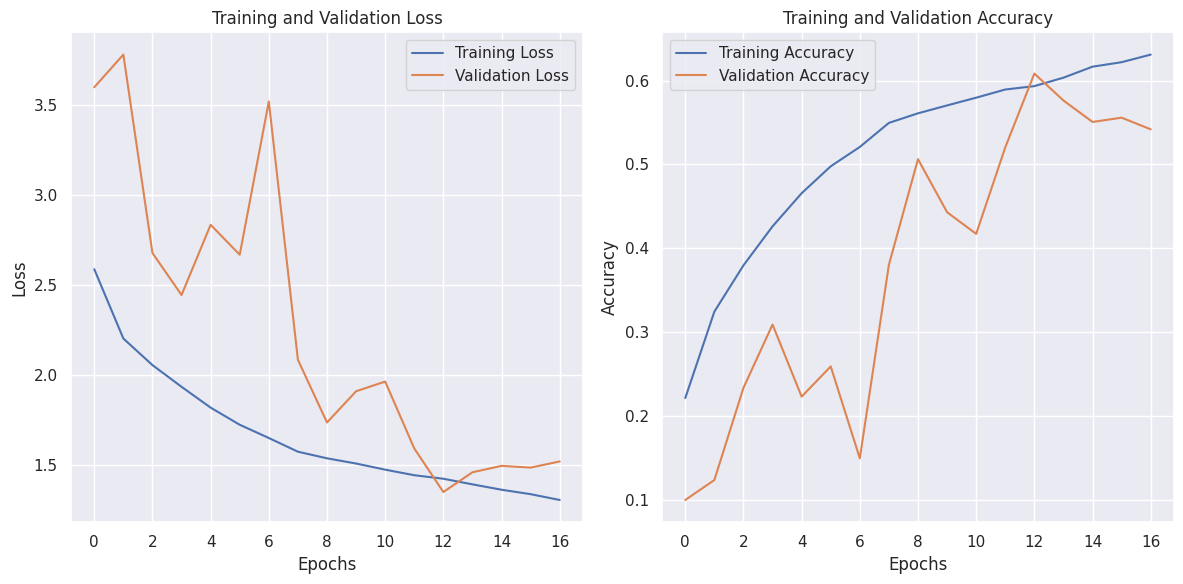

In [93]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history_cnn_3.history['loss'], label='Training Loss')
plt.plot(history_cnn_3.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_cnn_3.history['accuracy'], label='Training Accuracy')
plt.plot(history_cnn_3.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# Let's Try a Model With Mixed Regularisations L1 & L2

In [94]:
cnn_4 = models.Sequential(name='cnn_4')

cnn_4.add(layers.InputLayer(input_shape=(32, 32, 3)))

cnn_4.add(layers.Conv2D(32, (3,3), padding='same',
                        kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001)))
cnn_4.add(layers.BatchNormalization())
cnn_4.add(layers.Activation('relu'))

cnn_4.add(layers.Conv2D(64, (3,3), padding='same',
                        kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001)))
cnn_4.add(layers.BatchNormalization())
cnn_4.add(layers.Activation('relu'))

cnn_4.add(layers.MaxPooling2D(2,2))
cnn_4.add(layers.Dropout(0.25))

cnn_4.add(layers.Conv2D(64, (3,3), padding='same',
                        kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001)))
cnn_4.add(layers.BatchNormalization())
cnn_4.add(layers.Activation('relu'))

cnn_4.add(layers.MaxPooling2D(2,2))
cnn_4.add(layers.Dropout(0.25))

cnn_4.add(layers.Conv2D(64, (3,3), padding='same',
                        kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001)))
cnn_4.add(layers.BatchNormalization())
cnn_4.add(layers.Activation('relu'))

cnn_4.add(layers.MaxPooling2D(2,2))
cnn_4.add(layers.Dropout(0.25))

cnn_4.add(layers.Conv2D(64, (3,3), padding='same',
                        kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001)))
cnn_4.add(layers.BatchNormalization())
cnn_4.add(layers.Activation('relu'))

cnn_4.add(layers.MaxPooling2D(2,2))
cnn_4.add(layers.Dropout(0.25))

cnn_4.add(layers.Flatten())

cnn_4.add(layers.Dense(128, kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001)))
cnn_4.add(layers.BatchNormalization())
cnn_4.add(layers.Activation('relu'))
cnn_4.add(layers.Dropout(0.5))

cnn_4.add(layers.Dense(64, kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001)))
cnn_4.add(layers.BatchNormalization())
cnn_4.add(layers.Activation('relu'))
cnn_4.add(layers.Dropout(0.3))

cnn_4.add(layers.Dense(10, activation='softmax'))

cnn_4.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "cnn_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_17 (Conv2D)              │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_14          │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_14 (Activation)      │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (None, 32, 32, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_15          │ (None, 32, 32, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_15 (Activation)      │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_27 (Dropout)            │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_16          │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_16 (Activation)      │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_28 (Dropout)            │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_20 (Conv2D)              │ (None, 8, 8, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_17          │ (None, 8, 8, 64)       │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_17 (Activation)      │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_29 (Dropout)            │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_21 (Conv2D)              │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_18          │ (None, 4, 4, 64)       │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_18 (Activation)      │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 2, 2, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 173,898 (679.29 KB)

 Trainable params: 172,938 (675.54 KB)

 Non-trainable params: 960 (3.75 KB)

In [95]:
cnn_4.compile(optimizer=Adam(learning_rate=0.001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [96]:
history_cnn_4 = cnn_4.fit(
    X_train, y_train,
    validation_split=0.2,
    batch_size=256,
    epochs=50,
    callbacks=[early_stop , reduce_lr]
)

Epoch 1/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 26s 88ms/step - accuracy: 0.1916 - loss: 9.3736 - val_accuracy: 0.0997 - val_loss: 6.5779 - learning_rate: 0.0010
Epoch 2/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 23s 25ms/step - accuracy: 0.3794 - loss: 4.5748 - val_accuracy: 0.0997 - val_loss: 4.5579 - learning_rate: 0.0010
Epoch 3/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - accuracy: 0.4812 - loss: 2.7496 - val_accuracy: 0.1336 - val_loss: 3.8830 - learning_rate: 0.0010
Epoch 4/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - accuracy: 0.5333 - loss: 2.3540 - val_accuracy: 0.1609 - val_loss: 3.2379 - learning_rate: 0.0010
Epoch 5/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - accuracy: 0.5621 - loss: 2.1901 - val_accuracy: 0.4671 - val_loss: 2.4078 - learning_rate: 0.0010
Epoch 6/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - accuracy: 0.5797 - loss: 2.1406 - val_accuracy: 0.4280 - val_loss: 2.5115 - learning_rate: 0.0010
Epoch 7/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - accuracy: 0.5922 - loss: 